# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1694288269417.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,09/08/2023,4457.49,--,4451.30,4473.53,4448.38
1,09/07/2023,4451.14,--,4434.55,4457.81,4430.46
2,09/06/2023,4465.48,--,4490.35,4490.35,4442.38
3,09/05/2023,4496.83,--,4510.06,4514.29,4496.01
4,09/01/2023,4515.77,--,4530.60,4541.25,4501.35
...,...,...,...,...,...,...
2533,09/13/2013,1687.99,--,1685.04,1688.73,1682.22
2534,09/12/2013,1683.42,--,1689.21,1689.97,1681.96
2535,09/11/2013,1689.13,--,1681.04,1689.13,1678.70
2536,09/10/2013,1683.99,--,1674.32,1684.09,1674.32


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2538.000000,2538.000000,2538.000000,2538.000000
mean,2913.967569,2897.878570,2913.587715,2880.987333
std,888.670859,921.534139,928.058087,914.792110
min,1655.450000,0.000000,0.000000,0.000000
25%,2096.125000,2095.060000,2102.587500,2085.132500
50%,2733.150000,2733.010000,2746.775000,2716.735000
75%,3784.855000,3780.450000,3811.357500,3741.042500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2518.000000,2518.000000,2518.000000,2518.000000
mean,2921.389341,2920.895874,2936.729793,2903.870473
std,888.215743,888.096406,894.509126,881.486285
min,1655.450000,1656.850000,1662.470000,1646.470000
25%,2099.075000,2098.645000,2105.110000,2088.475000
50%,2740.530000,2738.525000,2754.085000,2722.630000
75%,3790.792500,3788.045000,3820.467500,3749.577500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2537
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2518 non-null   object 
 1   Close/Last  2518 non-null   float64
 2   Volume      2518 non-null   object 
 3   Open        2518 non-null   float64
 4   High        2518 non-null   float64
 5   Low         2518 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.7+ KB


In [5]:
df.shape

(2518, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

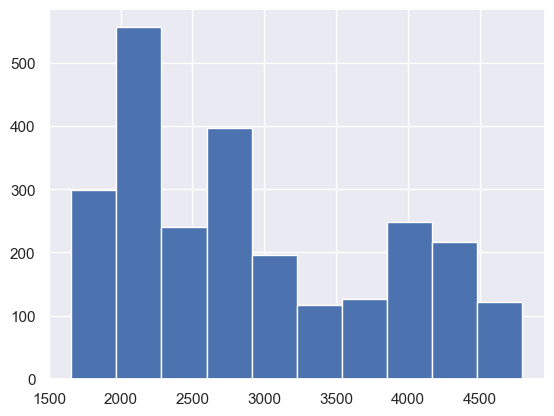

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4457.49

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2921.389340746633

In [10]:
close_sd = df['Close/Last'].std()
close_sd

888.2157427131879

In [11]:
sigma1 = close_mean + close_sd
sigma1

3809.605083459821

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4697.820826173009

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5141.928697529603

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2537
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-09-09 to 2023-09-08')

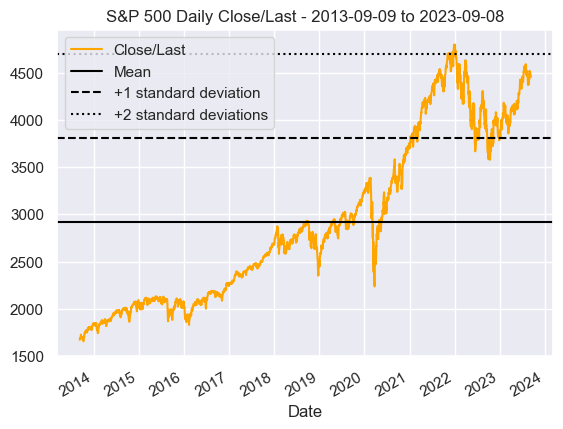

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-09-09 to 2023-09-08')

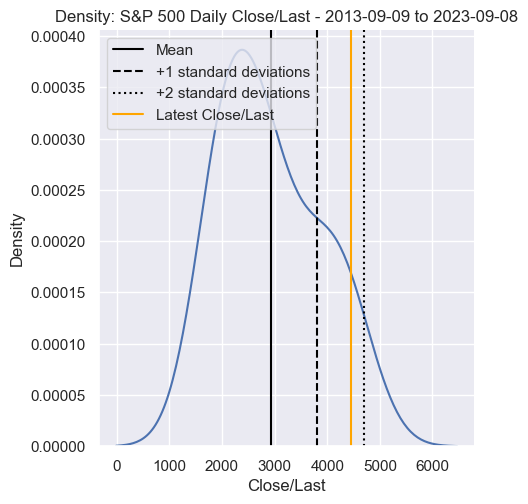

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.7294229153844058

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results